In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
from nltk.probability import FreqDist
from nltk.corpus import brown
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import random
from sklearn.feature_extraction.text import CountVectorizer
import re
from sklearn.metrics import roc_auc_score
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')
nltk.download('words')
nltk.download('stopwords')
nltk.download('brown')
nltk.download('nps_chat')
nltk.download('punkt')
nltk.download('wordnet')
#nltk.download('names')
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from tqdm import tqdm
import matplotlib.style as style
style.use('fivethirtyeight')
from textgenrnn import textgenrnn
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
stop_words = stopwords.words('english')

/Users/bassim/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/bassim/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bassim/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to /Users/bassim/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bassim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to /Users/bassim/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package nps_chat to /Users/bassim/nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package punkt to /Users/bassim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading pack

/Users/bassim/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# read all datasets

a = pd.read_csv('day_1.csv')
b = pd.read_csv('day_2_morning.csv')
c = pd.read_csv('day_3_morning.csv')
d = pd.read_csv('day_4_morning.csv')
e = pd.read_csv('day_5_morning.csv')
f = pd.read_csv('day_6_morning.csv')
g = pd.read_csv('day_7_morning.csv')
h = pd.read_csv('day_2_night.csv')
i = pd.read_csv('day_5_night.csv')
j = pd.read_csv('day_6_night.csv')
k = pd.read_csv('day_3_evening.csv')
l = pd.read_csv('day_4_evening.csv')
m = pd.read_csv('day_8_evening.csv')
n = pd.read_csv('day_7_night.csv')


In [3]:
data = pd.concat([a,b,c,d,e,f,g,h,i,j,k,l,m,n])
data.drop('Unnamed: 0',axis=1,inplace=True)
data.columns = ['title']

In [4]:
lowercase_sent = [str(x).lower() for x in list(data['title'])]

In [5]:
# Helper functions NLP

def tokenize(sentences):
    tokenized_sent = []
    tokenizer = RegexpTokenizer(r'\w+')
    for sentence in sentences:
        tokenized_sent.append(tokenizer.tokenize(sentence))
    return tokenized_sent

def rem_stop_words(sentences):
    cleaned_sents = []
    for sentence in sentences:
        cleaned_words = []
        for word in sentence:
            if word not in stop_words:
                cleaned_words.append(word)
        cleaned_sents.append(cleaned_words)
    return cleaned_sents

def lem(sentences):
    cleaned_sents = []
    lemmatizer=WordNetLemmatizer()
    for sentence in sentences:
        cleaned_words = []
        for word in sentence:
            cleaned_words.append(lemmatizer.lemmatize(word))
        cleaned_sents.append(cleaned_words)
    return cleaned_sents

def eng_sents(sentences):
    words = set(nltk.corpus.words.words())
    cleaned_sents = []
    for sentence in sentences:
        count_eng = 0
        count_non_eng = 0
        for word in sentence:
            if word not in words:
                count_non_eng +=1
            else:
                count_eng +=1
        if count_eng > count_non_eng:
            cleaned_sents.append(sentence)
    return cleaned_sents

def preprocess (sentences):
    return lem(rem_stop_words(eng_sents(tokenize(sentences))))

def pos_tag(sentences):
    pos_tagged_sents = []
    for sentence in work_sent:
        pos_tagged_sents.append(nltk.pos_tag(sentence))
    return pos_tagged_sents

In [6]:
sentences_processed = preprocess(lowercase_sent)

In [7]:
# supper annoying unicode thing I forgot to remove

final = []
for sentence in sentences_processed:
    test = []
    for word in sentence:
        if word !='xe2x80x94':
            test.append(word)
    final.append(test)

Text(0.5,1,'84 sentences start with a number i.e. 16% of all titles')

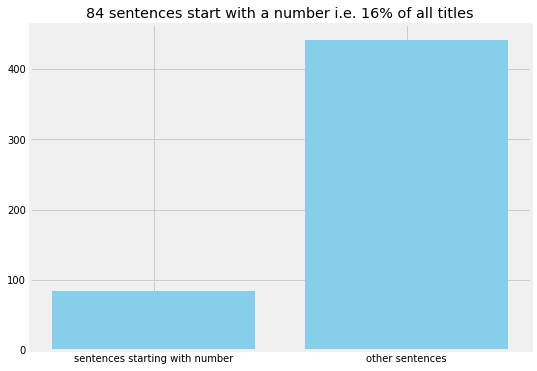

In [8]:
# sentences starting with number

start_with_num = 0
start_with_chr = 0
for sentence in sentences_processed:
    if sentence[0].isdigit() == True:
        start_with_num +=1
    else:
        start_with_chr +=1

plt.figure(figsize=(8,6))
plt.bar(x = ['sentences starting with number','other sentences'], height=[start_with_num,start_with_chr],color='skyblue')
plt.title('{} sentences start with a number i.e. {}% of all titles'.format(start_with_num,round((start_with_num/526)*100),2))

100%|██████████| 526/526 [00:00<00:00, 67461.82it/s]


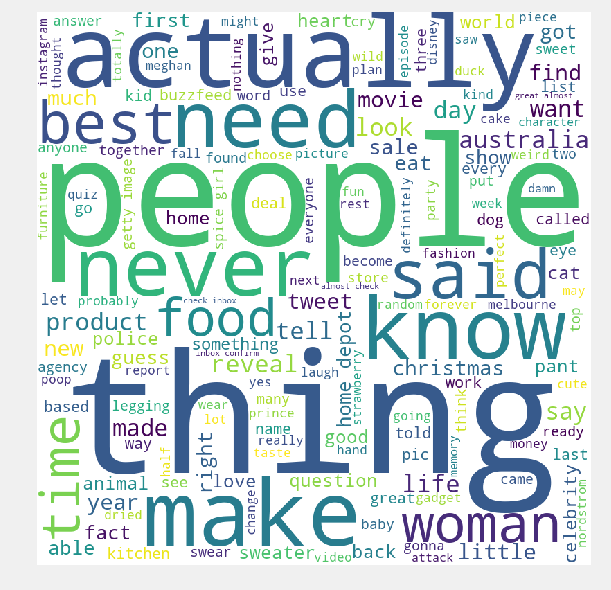

In [52]:
# initial wordcloud

comment_words = ' '
stopwords = set(STOPWORDS) 

for val in tqdm([' '.join(x) for x in final]): 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

Text(0.5,1,'Avg length of each title is 11.85 words')

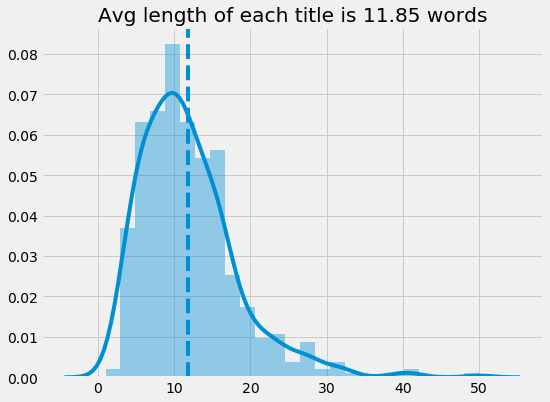

In [435]:
# Avg length of each title

plt.figure(figsize=(8,6))
sns.distplot([len(x) for  x in eng_sents(tokenize(lowercase_sent))])
plt.axvline(np.array([len(x) for  x in eng_sents(tokenize(lowercase_sent))]).mean(),ls='dashed')
plt.title('Avg length of each title is 11.85 words')


In [13]:
# Part of speech tagging

work_sent = eng_sents(tokenize(lowercase_sent))
pos_tagged = pos_tag(work_sent)

pos_sequences = []
word_sequences = []
for sentence in pos_tagged:
    seq1 = []
    seq2 = []
    for tup in sentence:
        seq1.append(tup[1])
        seq2.append(tup[0])
    pos_sequences.append(seq1)
    word_sequences.append(seq2)
# sequences with 11 words

pos_11 = [x for x in pos_sequences if len(x)==11]
word_11 = [x for x in word_sequences if len(x)==11]

In [14]:
sent_1,sent_2,sent_3,sent_4,sent_5,sent_6,sent_7,sent_8,sent_9,sent_10,sent_11 = [],[],[],[],[],[],[],[],[],[],[]

for sentence in pos_11:
    sent_1.append(sentence[0])

test_2 = []
for sentence in pos_11:
    if sentence[0] == max(sent_1,key=sent_1.count):
        sent_2.append(sentence[1])
        test_2.append(sentence[1:])
print ('first word in sequence',max(sent_1,key=sent_1.count))
        
test_3 = []
for sentence in test_2:
    if sentence[0] == max(sent_2,key=sent_2.count):
        sent_3.append(sentence[1])
        test_3.append(sentence[1:])
print ('second word in sequence',max(sent_2,key=sent_2.count))

test_4 = []
for sentence in test_3:
    if sentence[0] == max(sent_3,key=sent_3.count):
        sent_4.append(sentence[1])
        test_4.append(sentence[1:])
print ('third word in sequence',max(sent_3,key=sent_3.count))

test_5 = []
for sentence in test_4:
    if sentence[0] == max(sent_4,key=sent_4.count):
        sent_5.append(sentence[1])
        test_5.append(sentence[1:])
print ('fourth word in sequence',max(sent_4,key=sent_4.count))
        

first word in sequence CD
second word in sequence NNS
third word in sequence WDT
fourth word in sequence VBP


CD - numerical
NNS - noun, plural
WDT - that what whatever which whichever
VBP - Verb, non 3rd person singular present

In [15]:
# sentences following this sequence

idx = [pos_11.index(x) for x in pos_11 if [x[0],x[1],x[2],x[3]]==['CD','NNS','WDT','VBP']]
print (' '.join(word_11[idx[0]]))
print (' '.join(word_11[idx[1]]))
print (' '.join(word_11[idx[2]]))

21 tweets that dog owners and only dog owners will understand
17 toys that ll make you feel weirder than they should
25 pictures that are so damn dumb but so damn funny


Text(0.5,1,'word sequences found')

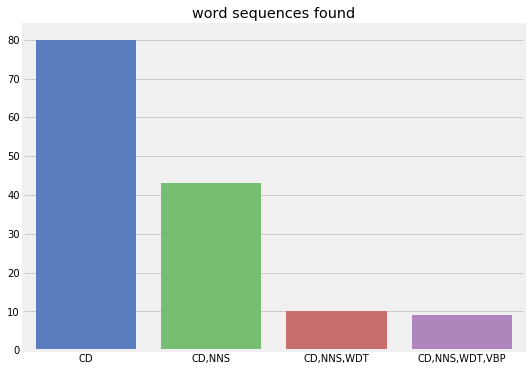

In [16]:
val_4 = len([x for x in pos_sequences if x[0]=='CD' and x[1]=='NNS' and x[2] == 'WDT' and x[3] == 'VBP'])
val_3 = len([x for x in pos_sequences if x[0]=='CD' and x[1]=='NNS' and x[2] == 'WDT'])
val_2 = len([x for x in pos_sequences if x[0]=='CD' and x[1]=='NNS'])
val_1 = len([x for x in pos_sequences if x[0]=='CD'])
plt.figure(figsize=(8,6))
sns.barplot(x=['CD','CD,NNS','CD,NNS,WDT','CD,NNS,WDT,VBP'],y=[val_1,val_2,val_3,val_4],palette='muted')
plt.title('word sequences found')

/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'avg number in title')

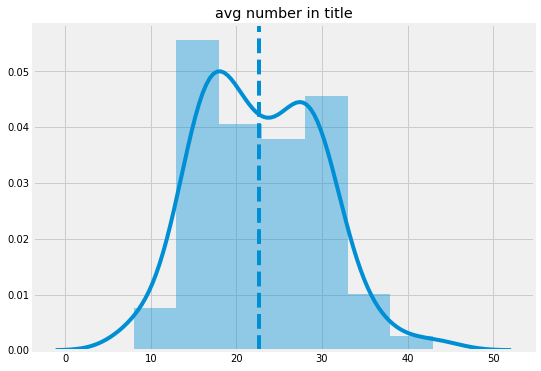

In [17]:
plt.figure(figsize=(8,6))
idx_nums = [pos_sequences.index(x) for x in pos_sequences if x[0]=='CD']
num_aray = np.array([int(word_sequences[x][0]) for x in idx_nums if word_sequences[x][0].isdigit()==True])
sns.distplot(num_aray)
plt.axvline(num_aray.mean(),ls='dashed')
plt.title('avg number in title')

In [46]:
test1 = []
for x in pos_sequences:
    if x[0] != 'CD':
        for y in x:
            if y in ['JJ','JJS','JJR']:
                idx_1 = pos_sequences.index(x)
                idx_2 = pos_sequences[idx_1].index(y)
                test1.append(word_sequences[idx_1][idx_2])

In [50]:
count = 0
for x in pos_sequences:
    if x[0] == 'CD':
        count +=1
count

80

In [47]:
len(test1)

470

100%|██████████| 428/428 [00:00<00:00, 177950.25it/s]


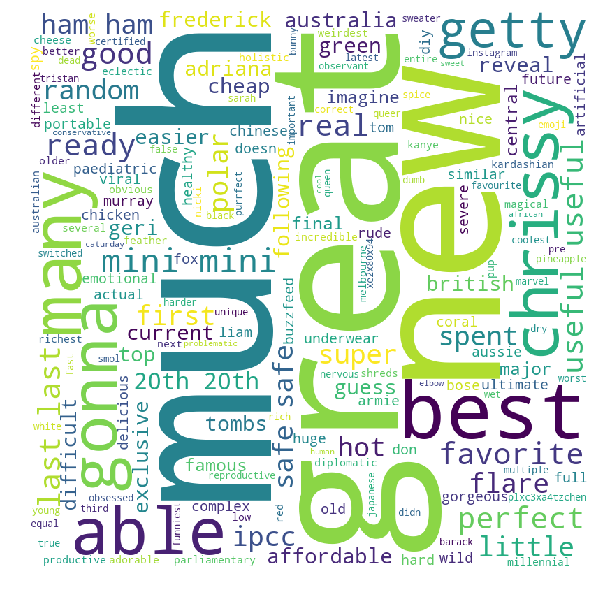

In [48]:
idx = [pos_sequences.index(x) for x in pos_sequences]
test = []
for_wcloud = []
for x in idx:
    for_wcloud.append(word_sequences[x])



comment_words = ' '
stopwords = set(STOPWORDS) 

for val in tqdm([x for x in test1 if len(x)>2]): 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [19]:
sid = SentimentIntensityAnalyzer()

In [20]:
sent_scores = []
for sentence in for_wcloud:
    sent_scores.append(sid.polarity_scores(' '.join(sentence)))

neg,neu,pos,compound = [],[],[],[]
for score in sent_scores:
    neg.append(score['neg'])
    neu.append(score['neu'])
    pos.append(score['pos'])
    compound.append(score['compound'])
data = pd.DataFrame()
data['title'] = [' '.join(x) for x in for_wcloud]
data['neg'] = neg
data['neu'] = neu
data['pos'] = pos
data['compound'] = compound
data.describe()

,neg,neu,pos,compound
count,80.000000,80.000000,80.000000,80.000000
mean,0.043425,0.833100,0.123462,0.163016
std,0.094253,0.178211,0.156842,0.330898
min,0.000000,0.341000,0.000000,-0.690800
25%,0.000000,0.702500,0.000000,0.000000
50%,0.000000,0.850500,0.000000,0.000000
75%,0.000000,1.000000,0.253750,0.426225
max,0.451000,1.000000,0.590000,0.881900


In [53]:
# 3 neutral titles

neutral = data.sort_values(by='neu',ascending=False).head(20)
neutral.drop_duplicates(inplace=True)


40    15 words you didn t know came from classic lit...
51      23 facts you didn t already know about stan lee
54    29 pieces of furniture you can get on sale at ...
53    16 tumblr posts about poop to read while you r...
52    30 snuggly scarves to wrap yourself up in all ...
27    29 things you didn t know you could get at the...
50            17 thoughts that everyone who watches the
1     11 celebrity throwback posts you need to see f...
30    31 pairs of boots under 50 that look more expe...
48    17 things you didn t know about libraries told...
45    21 holy grail fashion websites that every aust...
44    21 tweets that dog owners and only dog owners ...
42    18 things we all did in the 90s but will never...
35    16 tweets of people without their phones just ...
41     21 actually addictive fall vegetable side dishes
19    seven tombs containing cats and scarabs have b...
Name: title, dtype: object

In [54]:
[x for x in neutral['title']]

['15 words you didn t know came from classic literature',
 '23 facts you didn t already know about stan lee',
 '29 pieces of furniture you can get on sale at the home depot right now',
 '16 tumblr posts about poop to read while you re on the toilet',
 '30 snuggly scarves to wrap yourself up in all winter long',
 '29 things you didn t know you could get at the home depot',
 '17 thoughts that everyone who watches the',
 '11 celebrity throwback posts you need to see from this week',
 '31 pairs of boots under 50 that look more expensive than they actually are',
 '17 things you didn t know about libraries told to you by librarians',
 '21 holy grail fashion websites that every australian should be shopping on',
 '21 tweets that dog owners and only dog owners will understand',
 '18 things we all did in the 90s but will never do again',
 '16 tweets of people without their phones just living in the moment',
 '21 actually addictive fall vegetable side dishes',
 'seven tombs containing cats and s

In [23]:
# 3 positive titles

positive = data.sort_values(by='pos',ascending=False).head(5)

In [496]:
[x for x in positive['title']]

['16 extremely cute and fun kid friendly breakfast lunch ideas',
 '30 products that any super organized person will adore',
 '25 products that are just sweet little cutie pies ready to be in your life wow',
 '29 cleaning products under 10 that are surprisingly effective',
 '17 hilarious tweets about the']

In [497]:
# 3 negative titles

negative = data.sort_values(by='neg',ascending=False).head(5)

In [498]:
[x for x in negative['title']]

['25 pictures that are so damn dumb but so damn funny',
 '17 times people got revenge in the pettiest way imaginable',
 '43 products to solve your biggest frustrations',
 '18 weird smells no one is openly willing to admit they like',
 '28 weird things you never noticed about']

/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'sentiment score')

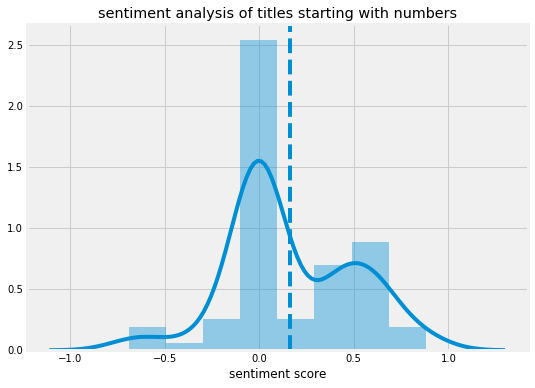

In [56]:
plt.figure(figsize=(8,6))
sns.distplot(data['compound'])
plt.axvline(x=0.163016,ls='dashed')
plt.title('sentiment analysis of titles starting with numbers')
plt.xlabel('sentiment score')

In [57]:
nouns_plural = []
wdt = ['which','that']
verb = []
for sent in word_sequences:
    for word in nltk.pos_tag(sent):
        if word[1] == 'NNS':
            nouns_plural.append(word[0])
        if word[1] == 'VB':
            verb.append(word[0])

nouns_plural = list(set([x for x in nouns_plural if x!='xe2x80x94' and len(x)>4 and x[-1]=='s']))
verb = list(set([x for x in verb if x!='xe2x80x94' and len(x)>3 ]))

In [74]:
from nltk.corpus import wordnet as wn
test = []
for synset in list(wn.all_synsets(wn.NOUN)):
    test.append(synset)

In [88]:
import inflect
inflect = inflect.engine()

In [124]:
one = [str(x).replace("Synset('",'') for x in test]
two = [x.split('.n.')[0] for x in one]
nouns = [str(x) + 's' for x in two if inflect.singular_noun(x)==False]
nouns = [x.replace('_',' ') for x in nouns]

In [97]:
test2 = []
for synset in list(wn.all_synsets(wn.VERB)):
    test2.append(synset)

In [117]:
one_ = [str(x).replace("Synset('",'') for x in test2]
verbs = [x.split('.v.')[0] for x in one_]
verbs = [x.replace('_',' ') for x in verbs]

In [134]:
def generate_buzzfeed_title(num):
    titles = []
    for x in range (num):
        gen = []
        gen.insert(0,str(np.random.randint(15,30)))
        gen.insert(1,random.choice(nouns))
        gen.insert(2,random.choice(wdt))
        gen.insert(3,'will')
        gen.insert(4,'definitely')
        gen.insert(5,random.choice(verbs))
        gen.insert(6,'you')
        titles.append(gen)
    return titles


In [131]:
gene = pd.DataFrame()

In [132]:
gene['titles'] = generate_buzzfeed_title(1000)

In [136]:
gene.to_csv('generated_titles.csv')

/Users/bassim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'sentiment score of 1000 generated buzzfeed titles')

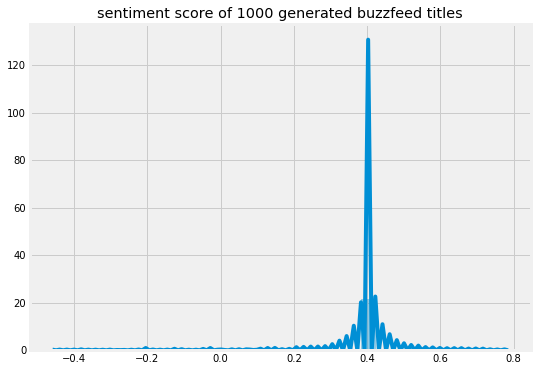

In [130]:
sent_gen = []
for sentence in [' '.join(x) for x in generate_buzzfeed_title(1000)]: 
    sent_gen.append(sid.polarity_scores(sentence)['compound'])
plt.figure(figsize=(8,6))
sns.distplot(sent_gen)
plt.title('sentiment score of 1000 generated buzzfeed titles')

In [ ]:
textgen = textgenrnn()
textgen.train_on_texts(lowercase_sent, num_epochs=10)
textgen.generate(2)

Training on 47,504 character sequences.
Epoch 1/10
371/371 [==============================] - 138s 372ms/step - loss: 1.9394
####################
Temperature: 0.2
####################
the same of the manday on the sitemap xc3xa9 and steeler and sitemap xc2xa9 xc2x94 because the more series of the show in the cookies and it's the main and it's the de service on the different series of the same store in the sabro sabres in a cooking and it is ano the from on the show of the show 

the show of the standard in a she says and it's the show of the show. 

it's the show of the seast and you are and what it's to check the most things on a stranger that is an in the sania and it's the movie and what it's the most seastic and it's the home sitemap xc2xa9 and it is the show of the sitemap xane and it is all you see in the store. 

####################
Temperature: 0.5
####################
it collo and the show of the shine and weals as you could think and your advice. 

it going to what is the li

In [434]:
nltk.pos_tag('ever'.split(' '))

[('ever', 'RB')]